<a href="https://colab.research.google.com/github/shiissaa/MAT422/blob/main/2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2.4.1 MLE for Random Samples**

Maximum likelihood estimation (MLE) is an effective approach of estimating
the parameters of a probability distribution through maximizing a likelihood
function. The MLE is the point in the parameter space that maximizes the likelihood function. The logic of maximum likelihood iss both intuitive and flexible, resulting in it becoming a dominant means of statistical inference.

Let $X_1, X_2,..., X_n$ have joint pmf or pdf $f(x_1,x_2,...,x_n;θ_1,...,θ_m)$ where the parameters $θ_1,...,θ_m$ have unknown values. When $x_1,x_2,...,x_n$ are the observed sample values and is regarded as a function of $θ_1,...,θ_m$, it is called the likelihood function. The maximum likelihood estimates are the values of the parameters (theta) that maximize the likelihood function so that the estimates provide an output greater than or equal to the ground truth theta values.

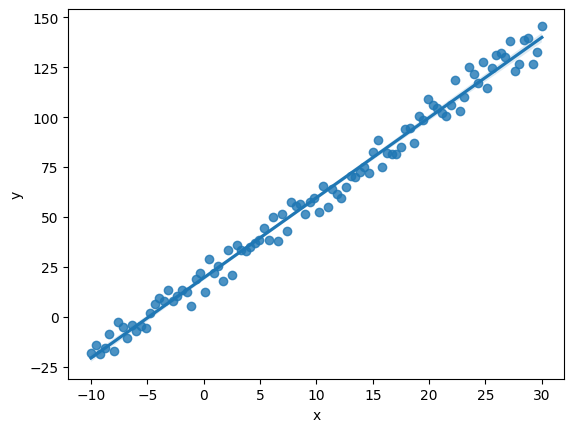

In [24]:
 # From https://github.com/RajkumarGalaxy/StructuredData/blob/master/MLE_Maximum_Likelihood_Estimation.ipynb
 import numpy as np
 import pandas as pd
 from matplotlib import pyplot as plt
 import seaborn as sns
 from statsmodels import api
 from scipy import stats
 from scipy.optimize import minimize

 x = np.linspace(-10, 30, 100)
 e = np.random.normal(10, 5, 100)
 y = 10 + 4*x + e
 df = pd.DataFrame({'x':x, 'y':y})
 sns.regplot(x='x', y='y', data = df)
 plt.show()

In [25]:
 # MLE function
 def MLE_Norm(parameters):
   const, beta, std_dev = parameters
   pred = const + beta*x
   LL = np.sum(stats.norm.logpdf(y, pred, std_dev))
   neg_LL = -1*LL
   return neg_LL

In [26]:
mle_model = minimize(MLE_Norm, np.array([2,2,2]), method='L-BFGS-B')
mle_model

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 307.1432507914644
        x: [ 1.948e+01  4.018e+00  5.220e+00]
      nit: 34
      jac: [-2.274e-05 -2.956e-04  2.274e-05]
     nfev: 224
     njev: 56
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>

**2.4.2 Linear Regression**

Given input data points, we seek an affine function to fit the data and each each $x_i$. We wish to discuss this from a probabilistic point of view by the  maximum likelihood estimation. Consider that we have n points, each of which is drawn in an independent and identicially distributed way from the normal distrubtion. We can use scikit's tools for this.

In [27]:
>>> from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)
reg.coef_
reg.intercept_
reg.predict(np.array([[3, 5]]))

array([16.])

The above method is similar to plain Ordinary Least Squares, which we could have also used as a benchmark for the method used in 2.4.1.